# Task03: Analysis on 'Year 1901' data

__Main question__ : Are SKC values being affected by other values?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read & clean data from 1901

In [2]:
df = pd.read_csv("./data/1901.txt", delim_whitespace=True)
print(df.shape)
df.head()

(6565, 33)


,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,...,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
0,29070,*****,190101010600,270,36,***,***,OVC,*,*,...,1020.0,*****,******,***,***,*****,*****,*****,*****,**
1,29070,*****,190101011300,290,18,***,***,SCT,*,*,...,1020.0,*****,******,***,***,*****,*****,*****,*****,**
2,29070,*****,190101012000,***,0,***,***,OVC,*,*,...,1020.0,*****,******,***,***,*****,*****,*****,*****,**
3,29070,*****,190101020600,180,18,***,***,OVC,*,*,...,1018.3,*****,******,***,***,*****,*****,*****,*****,**
4,29070,*****,190101021300,180,22,***,***,OVC,*,*,...,1017.6,*****,******,***,***,*****,*****,*****,*****,**


__I am interested in the SKC column__

What is exactly affecting SKC column?

In [3]:
df.SKC.unique()

array(['OVC', 'SCT', 'BKN', 'CLR', '***'], dtype=object)

In [4]:
df[df['SKC']=='SCT']

,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,...,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
1,29070,*****,190101011300,290,18,***,***,SCT,*,*,...,1020.0,*****,******,***,***,*****,*****,*****,*****,**
12,29070,*****,190101050600,270,9,***,***,SCT,*,*,...,1018.2,*****,******,***,***,*****,*****,*****,*****,**
13,29070,*****,190101051300,270,5,***,***,SCT,*,*,...,1025.9,*****,******,***,***,*****,*****,*****,*****,**
14,29070,*****,190101052000,230,9,***,***,SCT,*,*,...,1026.7,*****,******,***,***,*****,*****,*****,*****,**
15,29070,*****,190101060600,270,14,***,***,SCT,*,*,...,1027.5,*****,******,***,***,*****,*****,*****,*****,**
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6547,227070,*****,190112260600,050,5,***,***,SCT,*,*,...,1008.8,*****,******,***,***,*****,*****,*****,*****,**
6548,227070,*****,190112261300,050,5,***,***,SCT,*,*,...,1008.3,*****,******,***,***,*****,*****,*****,*****,**
6549,227070,*****,190112262000,050,2,***,***,SCT,*,*,...,1008.7,*****,******,***,***,*****,*****,*****,*****,**
6552,227070,*****,190112272000,140,7,***,***,SCT,*,*,...,1006.7,*****,******,***,***,*****,*****,*****,*****,**


In [5]:
df['Year'] = df['YR--MODAHRMN'].astype('str').str[:4]
df['Month'] = df['YR--MODAHRMN'].astype('str').str[4:6]
df['Day'] = df['YR--MODAHRMN'].astype('str').str[6:8]
df.head()

,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,...,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD,Year,Month,Day
0,29070,*****,190101010600,270,36,***,***,OVC,*,*,...,***,***,*****,*****,*****,*****,**,1901,01,01
1,29070,*****,190101011300,290,18,***,***,SCT,*,*,...,***,***,*****,*****,*****,*****,**,1901,01,01
2,29070,*****,190101012000,***,0,***,***,OVC,*,*,...,***,***,*****,*****,*****,*****,**,1901,01,01
3,29070,*****,190101020600,180,18,***,***,OVC,*,*,...,***,***,*****,*****,*****,*****,**,1901,01,02
4,29070,*****,190101021300,180,22,***,***,OVC,*,*,...,***,***,*****,*****,*****,*****,**,1901,01,02


__Replace stars to NaN value__

In [6]:
missing_val = ['*', '**', '***', '****', '*****', '******', 'nan'] 
df = df.replace(missing_val, np.nan)

In [7]:
print(df.isnull().sum())

USAF               0
WBAN            6565
YR--MODAHRMN       0
DIR              508
SPD               17
GUS             6565
CLG             6565
SKC               11
L               6565
M               6565
H               6565
VSB                0
MW              6199
MW.1            6565
MW.2            6565
MW.3            6565
AW              6565
AW.1            6565
AW.2            6565
AW.3            6565
W               6565
TEMP               1
DEWP            6565
SLP               18
ALT             6565
STP             6565
MAX             6565
MIN             6565
PCP01           6565
PCP06           6565
PCP24           6565
PCPXX           6565
SD              6565
Year               0
Month              0
Day                0
dtype: int64


__Create new dataframe, 'feature'__

In [8]:
feature = df[['USAF', 'DIR', 'SPD', 'SKC', 'TEMP', 'Month']]
feature.dtypes

USAF      int64
DIR      object
SPD      object
SKC      object
TEMP     object
Month    object
dtype: object

__Drop all rows with null value__

In [9]:
print(feature.isnull().sum())
feature = feature.dropna()
print(feature.isnull().sum())

USAF       0
DIR      508
SPD       17
SKC       11
TEMP       1
Month      0
dtype: int64
USAF     0
DIR      0
SPD      0
SKC      0
TEMP     0
Month    0
dtype: int64


In [10]:
print(feature.shape)
feature.head()

(6055, 6)


,USAF,DIR,SPD,SKC,TEMP,Month
0,29070,270,36,OVC,18,01
1,29070,290,18,SCT,19,01
3,29070,180,18,OVC,21,01
4,29070,180,22,OVC,22,01
5,29070,180,22,OVC,27,01


In [11]:
col = ['DIR', 'SPD', 'TEMP', 'Month']

for i in col:
    feature[i] = feature[i].astype('int')

feature.dtypes

USAF      int64
DIR       int64
SPD       int64
SKC      object
TEMP      int64
Month     int64
dtype: object

## Brief analysis with box plots

__SKC(SKY COVER) Labels__

CLR = CLEAR

SCT = SCATTERED (1/8 ~ 4/8)

BKN = BROKEN(5/8 ~ 7/8)

OVC = OVERCAST

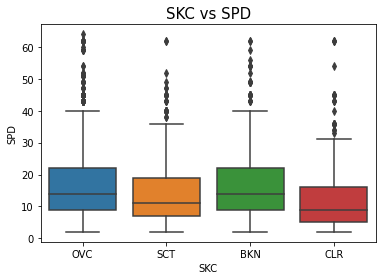

In [12]:
sns.boxplot(x="SKC", y="SPD", data=feature)
plt.title("SKC vs SPD", fontsize = 15)
plt.show()

__SKC vs SPD: Similar outliers existed for all four labels__

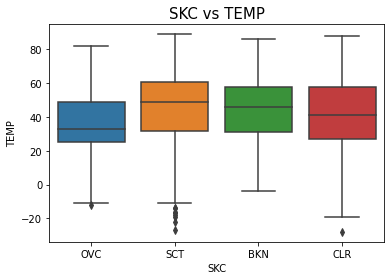

In [13]:
sns.boxplot(x="SKC", y="TEMP", data=feature)
plt.title("SKC vs TEMP", fontsize = 15)
plt.show()

__Seems like outliers in Temperature are affecting SCT more than others__

## Monthly analysis with heatmap

In [40]:
heatmap_SKC = feature[['SKC','DIR','SPD','TEMP','Month']]
heatmap_SKC = pd.pivot_table(heatmap_SKC, index=['SKC'])
heatmap_SKC.head()

,DIR,Month,SPD,TEMP
SKC,,,,
BKN,206.841026,6.781538,17.317949,44.496410
CLR,206.076923,5.746154,12.046154,39.998901
OVC,180.032415,6.824149,16.994327,35.426256
SCT,209.917744,6.535840,13.737368,45.507638


In [41]:
heatmap_SKC_norm=(heatmap_SKC-heatmap_SKC.mean())/heatmap_SKC.std()
heatmap_SKC_norm.head()

,DIR,Month,SPD,TEMP
SKC,,,,
BKN,0.440915,0.618926,0.895944,0.679097
CLR,0.385901,-1.450807,-1.163007,-0.293869
OVC,-1.489248,0.704105,0.769550,-1.283088
SCT,0.662432,0.127776,-0.502487,0.897860


<AxesSubplot:ylabel='SKC'>

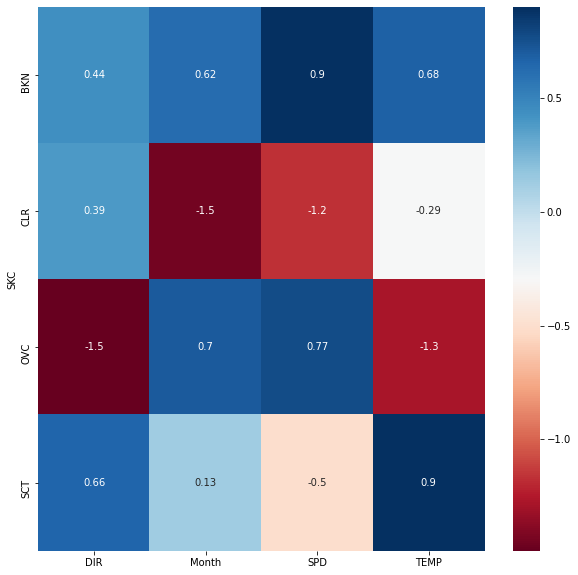

In [42]:
plt.figure(figsize = (10,10))
sns.heatmap(heatmap_SKC_norm, cmap="RdBu", annot=True)

## Conclusion

__In conclusion, SCT has the most correlation with TEMP, BKN with SPD, and OVC with SPD__